# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import statsmodels.formula.api as smf
import statsmodels.api as sm

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

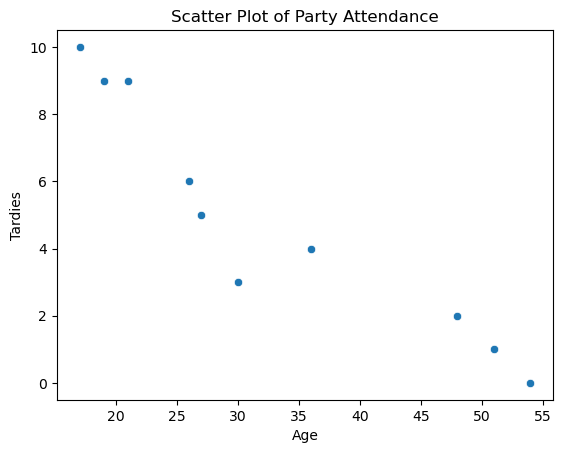

In [56]:
sns.scatterplot(data=student_data, x='Age', y='Tardies')
plt.title('Scatter Plot of Party Attendance')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

There is a negative relationship between the student's age and the number of tardies. Older students are expected to have less tardies than the younger ones. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
s_correlation = student_data['Age'].corr(student_data['Tardies'])
s_correlation

-0.9391626886887122

In [5]:
s_covariance = student_data['Age'].cov(student_data['Tardies'])
s_covariance

-45.56666666666666

The covariance is a measure of linear asociation, which value is not bounded, and change with the scales of the vairables. The correlation is the covariance but standarized, thus it's range is between -1 and 1, so it's not bounded to the original scale.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
X = student_data["Age"]
y = student_data["Tardies"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print(f'100% of our data: {len(X)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 10.
70% for training data: 7.
30% for test data: 3.


In [54]:
Age = sm.add_constant(student_data.Age) # Add a constant (intercept) to the model
results_student_model = sm.OLS(student_data.Tardies, Age).fit() # Fit the OLS model with intercept
print(results_student_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           5.57e-05
Time:                        17:00:04   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Plot your regression model on your scatter plot.

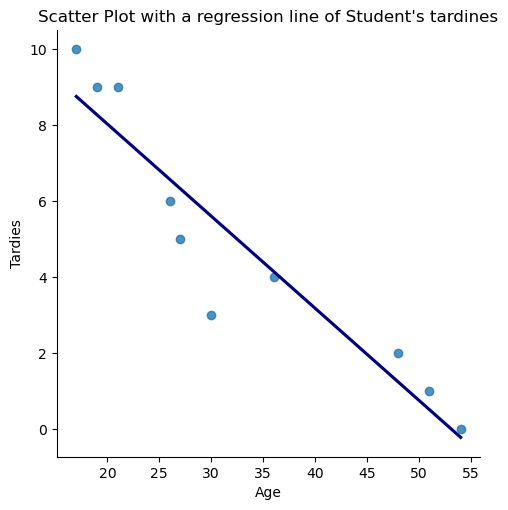

In [55]:
sns.lmplot(data=student_data, x='Age', y='Tardies', ci=None, line_kws={'color': 'darkblue'})  # ci=None suppresses the confidence interval if not desired

plt.title("Scatter Plot with a regression line of Student's tardines")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

In [12]:
vehicles.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


In [13]:
vehicles.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,35952.0,2000.716400,10.085290,1984.00,1991.000000,2001.000000,2010.000000,2017.000000
Engine Displacement,35952.0,3.338493,1.359395,0.60,2.200000,3.000000,4.300000,8.400000
Cylinders,35952.0,5.765076,1.755268,2.00,4.000000,6.000000,6.000000,16.000000
Fuel Barrels/Year,35952.0,17.609056,4.467283,0.06,14.699423,17.347895,20.600625,47.087143
City MPG,35952.0,17.646139,4.769349,6.00,15.000000,17.000000,20.000000,58.000000
Highway MPG,35952.0,23.880646,5.890876,9.00,20.000000,24.000000,27.000000,61.000000
Combined MPG,35952.0,19.929322,5.112409,7.00,16.000000,19.000000,23.000000,56.000000
CO2 Emission Grams/Mile,35952.0,475.316339,119.060773,37.00,395.000000,467.736842,555.437500,1269.571429
Fuel Cost/Year,35952.0,1892.598465,506.958627,600.00,1500.000000,1850.000000,2200.000000,5800.000000


In [14]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [21]:
Xv = vehicles[['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
yv = vehicles["CO2 Emission Grams/Mile"]

In [22]:
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv, test_size=0.3, random_state=42)

In [23]:
print(f'100% of our data: {len(Xv)}.')
print(f'70% for training data: {len(Xv_train)}.')
print(f'30% for test data: {len(Xv_test)}.')

100% of our data: 35952.
70% for training data: 25166.
30% for test data: 10786.


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [24]:
mv_linear = LinearRegression().fit(Xv_train,yv_train)

In [27]:
mv_linear_predictions = mv_linear.predict(Xv_test)
mv_linear_predictions

array([342.78252849, 516.50106289, 437.81633003, ..., 427.71874997,
       566.89840714, 425.68193763])

In [28]:
mv_linear_eval_df = pd.DataFrame({"actual":yv_test,"pred":mv_linear_predictions})
mv_linear_eval_df

,actual,pred
22550,341.807692,342.782528
17714,522.764706,516.501063
25440,423.190476,437.816330
26306,604.000000,582.639677
21624,484.000000,489.098359
...,...,...
13745,423.190476,419.348453
11000,807.909091,782.210063
10122,423.190476,427.718750
2701,555.437500,566.898407


In [29]:
mv_linear_eval_df["dif"] = abs(mv_linear_eval_df["actual"]-mv_linear_eval_df["pred"])
mv_linear_eval_df.head()

,actual,pred,dif
22550,341.807692,342.782528,0.974836
17714,522.764706,516.501063,6.263643
25440,423.190476,437.816330,14.625854
26306,604.000000,582.639677,21.360323
21624,484.000000,489.098359,5.098359


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [34]:
mv_linear_r2 = r2_score(yv_test, mv_linear_predictions)
mv_linear_RMSE = mean_squared_error(yv_test, mv_linear_predictions, squared=False)
mv_linear_MSE = mean_squared_error(yv_test, mv_linear_predictions)
mv_linear_MAE = mean_absolute_error(yv_test, mv_linear_predictions)

#Printing the results
print("R2 = ", round(mv_linear_r2, 4))
print("RMSE = ", round(mv_linear_RMSE, 4))
print("MSE =  ", round(mv_linear_MSE, 4)) 
print("MAE = ", round(mv_linear_MAE, 4))

R2 =  0.9816
RMSE =  16.0279
MSE =   256.8951
MAE =  7.5612


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [48]:
party_data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

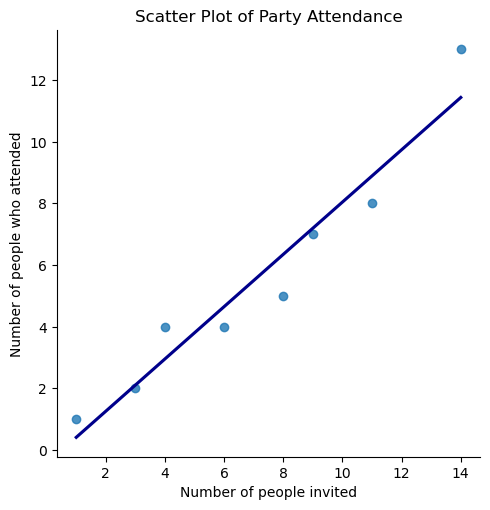

In [49]:
lm = sns.lmplot(data=party_data, x='X', y='Y', ci=None, line_kws={'color': 'darkblue'})  # ci=None suppresses the confidence interval if not desired
lm.set_axis_labels('Number of people invited', 'Number of people who attended') # Change the axis labels

plt.title('Scatter Plot of Party Attendance')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [53]:
X = sm.add_constant(party_data.X) # Add a constant (intercept) to the model
results_party_model = sm.OLS(party_data.Y, X).fit() # Fit the OLS model with intercept
print(results_party_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           0.000102
Time:                        16:57:44   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


The linear model shows a strong significant positive relationship between the number of people invited and the number of people who attends the party. About 92% of the variability of the people who attends the party is explained by the variability of the variable included en the model. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [57]:
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [63]:
party_data2 = outlier_slayer(party_data)

In [64]:
X2 = sm.add_constant(party_data2.X) # Add a constant (intercept) to the model
results_party_model2 = sm.OLS(party_data2.Y, X2).fit() # Fit the OLS model with intercept
print(results_party_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           0.000264
Time:                        17:25:50   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


The linear model shows a strong significant positive relationship between the number of people invited and the number of people who attends the party. The coeficient drop by aprox.0.3. However, the R2 increased by 2 pp.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

The sample size has 8 events, so it's a difficult decision to drop one of the events. In both of the models, the positive relation is shown, and the increase in the R2-adjusted is not much.